# Getting started
# MROB library is unfinished version of Mobile Robotics library. 
Please, don't publish this library anywhere. 

### MROB: Mobile Robotics library
The Skoltech Mobile Robotics library (mrob) is our common framework for implementing our robotics research and projects. It includes a core set of functionalities including perception, path planning and optimization. The present library is meant to be a self-contained library.

- common: common matrix definitions and typedefs.
- **SE3: Rigid Body Transformations library.**
- Fgraph: Factor Graph (WIP)
- PCReg: Point Cloud Registration (WIP)
- mrobPy Python bindings (using pybind11) for some of the above methods.

#### SE3 


 - **Constructors**:
    - Mat61,requires the Transformation in Se3
    - Mat4, requires the Transformation matrix 4x4, Lie algebra xi^ \in se3 representing the rigid body transformation around the identity, by default generates T = exp(0^) = I
    - SE3, allows to construct from Eigen expressions

  *Returns True is the matrix is a valid transformation and False if not*
 - **T()**, 4x4 Transformation matrix
 - **R()**, returns a matrix 3x3 of the SO3 rotation corresponding to the subblock matrix
 - **t()**, returns translation vector
 - **mul()**, multiplication function
 - **update_lhs()**, updates the current transformation incrementaly
 - **update_rhs()**,  exponential mapping of a skew symetric matrix in se3.
 - **ln()**, logarithm map, first we calculate ln(R) and then 
 
 V^-1 = I - 1/2 w^ + 1/o^2(1 - A / 2B) (w^)^2, $v = V^-1 t$ 

 Returns the vector $xi \in R^6$ which corresponds to the Lie algebra SE3
 - **transform()**, transforms a point $p = (x,y,z)'$ such as $res = T*p$. This function saves to transform to homogeneous coordinates.
 - **transform_array()**, transforms an array of points $P = {p_n} = (x,y,z)'_n$ such as $res = T*p_n$. The array is of the form $3xN$. This function saves to transform to homogeneous coordinates.
 - **inv()**, inverse: 
 $$
 T^-1 = \begin{vmatrix}
R'&-R't\\
0&1\\
\end{vmatrix}
$$
 - **adj()**, Adjoint: T Exp(x) = Exp ( Adj_T x) T
  $$
Adj_T  = \begin{vmatrix}
R & 0\\
t^R&R\\
\end{vmatrix}
$$
 - **distance()**,provide the distance as a norm on the tangent space of the $ln(T * T_{rhs}^{-1}) $
 - **print()**

## Download not compiled version of MROB libraray (mrob.zip) and unzip it

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='16sBf2VtnnlUnIPgqoKpR_rN8WTU88uSA',
                                    dest_path='./mrob.zip',
                                    unzip=True)

gdd.download_file_from_google_drive(file_id='1M0dWo5MY5aPuffJALKQJSfX7nDWLg4Ms',
                                    dest_path='./utils.py',
                                    unzip=False)

Unzipping...Done.


## Install dependencies and compile the library


In [2]:
!sudo apt install build-essential cmake python3-distutils python3-dev libeigen3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-distutils is already the newest version (3.6.9-1~18.04).
python3-distutils set to manually installed.
Suggested packages:
  libeigen3-doc libmrpt-dev
The following NEW packages will be installed:
  libeigen3-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 810 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeigen3-dev all 3.3.4-4 [810 kB]
Fetched 810 kB in 0s (7,619 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> 

In [3]:
!cd mrob && mkdir build && cd build && cmake .. && make -j

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Eigen not found, adding manually directories. BE CAREFULL to have installed Eigen here:/usr/local/include/eigen3/usr/include/eigen3
/usr/local/include/eigen3/usr/include/eigen3
-- Found PythonInterp: /usr/bin/python3.6 (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.3.dev0
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO ena

## Check if everything exists

In [4]:
!ls -l 'mrob/lib'

total 800
-rwxr-xr-x 1 root root  13880 Apr  9 07:57 libcommon.so
-rwxr-xr-x 1 root root  51640 Apr  9 07:58 libEigenFactors.so
-rwxr-xr-x 1 root root 203344 Apr  9 07:58 libFGraph.so
-rwxr-xr-x 1 root root 207704 Apr  9 07:58 libPCRegistration.so
-rwxr-xr-x 1 root root  65496 Apr  9 07:57 libSE3.so
-rwxr-xr-x 1 root root 269952 Apr  9 07:58 mrob.cpython-36m-x86_64-linux-gnu.so


## Import libraries

In [0]:
path = 'mrob/lib'
import sys
sys.path.append(path)
import mrob

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
#@title
def plot_pose(frames=[], poses=[], show_t=True, show_coord=True, show_pose=True, t_names=['$\mathbf{t}$']):
    """Plotting poses in frames

    Args:
        frames (list): frames to plot in addition to original frame.
        poses (list): poses to plot in the original frame.
        
        show_t (bool): depict t-vector name
        show_coord (bool): depict pose coordinates

    Returns:
        None.
    """
    def get_xyzuvctt(T):
        t = T[:3, 3:4].flatten(); t_ = t/(np.linalg.norm(t)+1e-5)*5
        R = T[:3,:3]
        (x, y, z), (u, v, c) = np.repeat(t_.reshape(3,1),3, axis=1), R
        return x, y, z, u, v, c, t, t_
 
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    lngth = 3

    # fig appearance
    ax.view_init(elev=22, azim=32)
    #ax.set_aspect('equal')
    ax.view_init(elev=22, azim=20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('off'); #ax.axis('equal')
    
    
    #origin and coordinate axes (coordinate frame)
    xl = 'x'; yl = 'y'; zl = 'z'; ol = 'O'
    x, y, z, u, v, c, t, t_ = get_xyzuvctt(np.eye(4))
        
    ax.scatter(t_[0], t_[1], t_[2], s=80, c='k')
    ax.quiver(x, y, z, u, v, c, color='k', length=lngth, arrow_length_ratio=0.2, linewidth=0.5)
    ax.text(0,-0.5,-0.1,ol); 
    ax.text(lngth*1.2,0,0,xl); ax.text(0,lngth*1.2,0,yl); ax.text(0,0,lngth*1.2,zl)
    # aid to have initial minimum dimensions of plot
    ax.scatter(4,4,4, alpha=0)
    
    for frame in frames:
        x, y, z, u, v, c, t, t_ = get_xyzuvctt(frame)
        ax.scatter(t_[0], t_[1], t_[2], s=80, c='k')
        ax.quiver(
            x, y, z, u, v, c, color='k', length=lngth, arrow_length_ratio=0.2, linewidth=0.5)
        xl += '\''; yl += '\''; zl += '\''; ol += '\''
        ax.text(t_[0],t_[1]-0.5,t_[2]-0.1,ol); 
        frame = frame @ np.diag([lngth*1.2, lngth*1.2, lngth*1.2, 1])
        ax.text(frame[:3,:3][0][0]+t_[0],frame[:3,:3][1][0]+t_[1], frame[:3,:3][2][0]+t_[2],xl);
        ax.text(frame[:3,:3][0][1]+t_[0],frame[:3,:3][1][1]+t_[1], frame[:3,:3][2][1]+t_[2],yl);
        ax.text(frame[:3,:3][0][2]+t_[0],frame[:3,:3][1][2]+t_[1], frame[:3,:3][2][2]+t_[2],zl);
        
    for i, pose in enumerate(poses):
        # given frame
        x, y, z, u, v, c, t, t_ = get_xyzuvctt(pose)
        if show_pose:
            ax.quiver(x, y, z, u, v, c, arrow_length_ratio=0, color=['r','g','b'], linestyle='-', linewidth=4)
        # t-vector
        alr = 1/(np.linalg.norm(t_)+1e-5)*0.5
        ax.quiver(0,0,0, t_[0], t_[1], t_[2], color='k', arrow_length_ratio=alr, linewidth=2)
        for frame in frames:
            _, _, _, _, _, _, _, tf_ = get_xyzuvctt(frame)
            tf2_ = t_-tf_
            ax.quiver(tf_[0], tf_[1], tf_[2], tf2_[0], tf2_[1], tf2_[2],
                      color='k', arrow_length_ratio=alr, linewidth=2)
        # t-vector name
        #if show_t:
            #tf2_ = t_-tf_/2
        #    ax.text(t_[0]/2, t_[1]/2, t_[2]/2+0.4, t_names[i], fontsize=20)
        # coordinates
        if show_coord:
            ax.text(t_[0], t_[1], t_[2]-0.7, '('+str(t[0])+','+str(t[1])+','+str(t[2])+')')

# Utility for plotting frames and poses
- `plot_pose()` - plots empty frame
- `plot_pose(poses=[T])` - plots pose RBT $T$


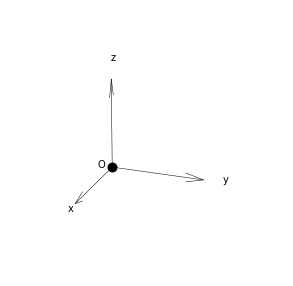

In [8]:
plot_pose()

# During this seminar you should work with `mrob.SO(3)` and `mrob.SE(3)` objects and their methods above.

# Task 1. RBT
Compute the identity transformation and plot its axes.  
Compute inverse transformation. Notice the results.

_Here you can definitely use_ `numpy`



T^{-1}: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


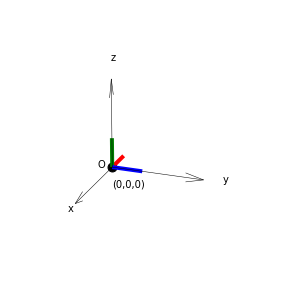

In [10]:
T = np.eye(4)

w_T_t_init = np.array([[-1, 0, 0, 0],
                       [ 0, 0, 1, 0],
                       [ 0, 1, 0, 0],
                       [ 0, 0, 0, 1]])

poses = [T]
plot_pose(poses=[w_T_t_init])

inv_T = np.linalg.inv(T)
print('\nT^{-1}:', inv_T)

## Translation RBT
Construct a RBT transfromation when $t_x:= t_x+1$. Plot the axes and calcuate the inverse.

In [0]:
T = np.eye(4)
T[0,3]=1

poses


[array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])]

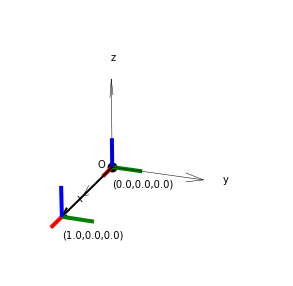

In [0]:
T2 = np.eye(4)
T2[:3, 3] = np.array([1,0,0])

poses.append(T2)


plot_pose(poses=poses)

In [0]:
np.random.randn(3)

[ 0.49935037  0.53416969 -1.10877921]
[[ 0.34762857  0.92523905  0.15194435  0.        ]
 [-0.69547889  0.36312741 -0.62003838  1.        ]
 [-0.62885888  0.10986896  0.76971769  0.        ]
 [ 0.          0.          0.          1.        ]]
[ 0.69547889 -0.36312741  0.62003838]
[ 0.69547889 -0.36312741  0.62003838]


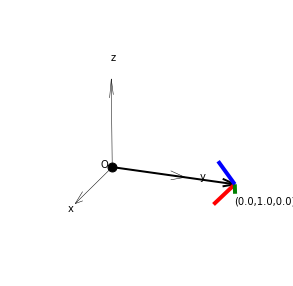

In [0]:
rand_arr = np.random.randn(3)
print(rand_arr)
R = mrob.SO3(rand_arr).R()

t = np.array([0,1,0])
t.shape

T = np.eye(4)
T[:3,:3] = R
T[:3,3] = t

print(T)

plot_pose(poses=[T])

print(-np.linalg.inv(R) @ t)
print(np.linalg.inv(T)[:3,3])

# Rotation and Translation
Construct a RBT $T$ given a random rotation R and translation part of $\mathbf{t}=[0,1,0]$.  
Compare $-R^\top \mathbf{t}$ and translation of $T^{-1}$.  

In [0]:
R = mrob.SO3(np.random.randn(3)).R()
t = np.array([0,1,0])
T = np.eye(4)
T[:3, :3] = R
T[:3, 3] = t

print(T)

plot_pose(poses=[T])

invT = np.linalg.inv(T)

t_hat = -R.T @ t

print(t_hat, invT[:3, 3])

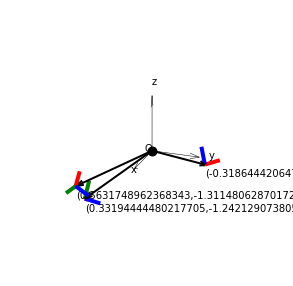

In [0]:
T1 = mrob.SE3(np.random.randn(6)).T()
T2 = mrob.SE3(np.random.randn(6)).T()

T12 = T1@T2
T21 = T2@T1

plot_pose(poses=[T1,T2,T12])

# Chain of transformations
Compute chain of two random transformations $T_1$ and $T_2$ with different ordering.  
Notice the result.  

In [0]:
xi1 = np.random.randn(6)
xi2 = np.random.randn(6)

T1 = mrob.SE3(xi1).T()
T2 = mrob.SE3(xi2).T()

#R = mrob.SO3(np.random.randn(3)).R()

T12 = T1 @ T2
T21 = T2 @ T1

#plot_poses([T12, T21])

print (xi1)
print()
print(np.linalg.inv(T12) @ T21)

print(mrob.SE3(np.linalg.inv(T12) @ T21).ln())

print(mrob.SE3(np.eye(4)).ln())

[-0.87258476 -0.25653173  0.62693194  0.26979467  0.89225104  1.30228473]

[[ 0.27877143  0.39738177 -0.87428498 -2.25181753]
 [ 0.65729143  0.58479063  0.47538184  0.94839646]
 [ 0.70018174 -0.7071829  -0.09817271  2.21369365]
 [ 0.          0.          0.          1.        ]]
[-1.00524513 -1.33838339  0.22093752 -0.23407331 -0.32615913  3.67330781]
[-0.  0. -0.  0.  0.  0.]


# Eponential mapping
Compute exponential mapping $\operatorname{Exp}: \mathfrak{se}(3) \to SO(3)$ for 
- zero twist $\mathbf{\xi}$.
- zero $\mathbf{v}$ part of twist $\mathbf{\xi}$.
- zero $\boldsymbol{\omega}$ part of twist $\mathbf{\xi}$.

Where $\boldsymbol{\xi} = [\omega_1, \omega_2, \omega_3, v_1, v_2, v_3] \in \mathbb{R^{3+3}}$ for this and the next task.

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

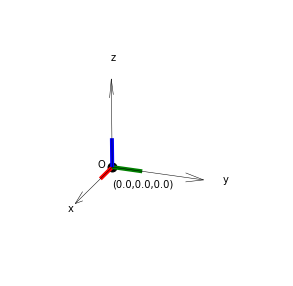

In [0]:
xi = np.zeros(6)
T = mrob.SE3(xi).T()

plot_pose(poses=[T])
T

array([-0.63010174,  0.39143747, -0.58544902, -0.        ,  0.        ,
       -0.        ])

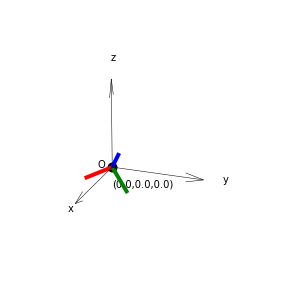

In [0]:
xi = np.random.randn(6) * np.array([1,1,1,0,0,0])
# xi = np.array([0,0,1.57,0,0,0])
T = mrob.SE3(xi).T()

plot_pose(poses=[T])
xi

array([[ 1.        ,  0.        ,  0.        , -0.74436932],
       [ 0.        ,  1.        ,  0.        , -0.81831292],
       [ 0.        ,  0.        ,  1.        , -0.10914288],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

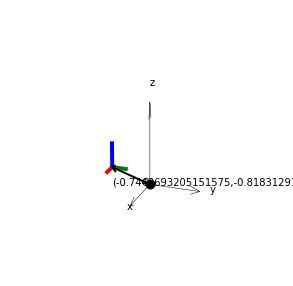

In [0]:
xi = np.random.randn(6) * np.array([0,0,0,1,1,1])
T = mrob.SE3(xi).T()

plot_pose(poses=[T])
T

# Logarithm mapping

Check if inverse mapping $\operatorname{Ln} SO(3) \to \mathfrak{se}(3)$ gives initial twist $\xi$. For this do the following:
- arbitrary twist $\mathbf{\xi}$ and inverse operation. Compute the norm of the $\boldsymbol{\omega}$.
- arbitrary twist $\mathbf{\xi}$ with high variance (x10) and inverse opertaion. Compute the norm of $\boldsymbol{\omega}$

What is a difference between these bullit in the result?

In [0]:
xi = np.random.randn(6)
T = mrob.SE3(xi).T()
omega_norm = np.linalg.norm(xi[:3])

xi2 = np.random.randn(6) * 10
T2 = mrob.SE3(xi2).T()
omega2_norm = np.linalg.norm(xi2[:3])

In [0]:
#your criterion here
def is_close(xi1, xi2):
  answer = np.linalg.norm(xi1-xi2)<1e-4 # bool: True / False
  return answer

xi_prime1 = mrob.SE3(T).ln()
xi_prime2 = mrob.SE3(T2).ln()

print('Is close:', is_close(xi, xi_prime1))
print('Is close:', is_close(xi2, xi_prime2))

Is close: True
Is close: False


In [0]:
omega_norm

1.4260399899789904

In [0]:
omega2_norm

16.869694821664133

# Adjoint

Compute Adjoint of given transformation $T$.  

Check correctness of your computation given
twist $\xi$ (see the lecture)

In [0]:
#TODO
xi = np.random.randn(6)
mrob_obj = mrob.SE3(xi)

T = mrob.SE3(np.random.randn(6)).T()

adjT = mrob_obj.adj()

print(T @ mrob.SE3(xi).T())

[[-0.41822662 -0.62197181 -0.66199514  2.34397696]
 [ 0.11313994  0.68744934 -0.71736515 -1.11026647]
 [ 0.90126902 -0.3749193  -0.21713976  0.59665875]
 [ 0.          0.          0.          1.        ]]


In [0]:
print(mrob.SE3(adjT).T() @ T)

TypeError: ignored

# Sampling noise
Given a pose $T$. Check the effect of noisy twist $\xi \in \mathbb{R}^6$ on the $T$:
- sample resulted positions,
- plot the result,
- check different parameters of noise.
Better start from 
$$\xi \sim \mathcal{N}\left(\,\mathbf{0}, \,\operatorname{diag} ([0, 0, 0.3, 0.1, 0, 0])\,\right)$$ 
and
$$
T = 
\begin{bmatrix}
    I &
\begin{pmatrix}
    1\\
    0\\
    0
\end{pmatrix}\\
    \mathbf{0} & 1
\end{bmatrix}$$
Assume the action of the noisy from left hand side of $T$.

In [0]:
#TODO
T = np.eye(4)
T[:3, 3] = np.array([1,0,0])

mrob_SE3_obj = mrob.SE3(T)
p = mrob_SE3_obj.t()
twists = np.random.randn(10000, 6, 1) * np.array([0,0,0.3,0.5,0,0]).reshape(1,6,1)  # shape (N, 3)

positions = np.array(list(map(lambda x : (mrob.SE3(x).T() @ T)[:3, 3] , twists)))  # shape (N, 3)


plt.figure(figsize=(7,7))
plt.plot(0,0,'ro', label='The origin')
plt.plot(positions[:,0], positions[:,1], ',', label='Distribution')
plt.plot(p[0], p[1], 'o', markersize=8, label='Initial point')
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Sampling from small twists')

In [0]:
mrob.SE3(twists[0]).T() @ T[:3, 3]